# Time Series Decomposition and Exponential Smoothing Methods

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore',message='')

## Hodrick Prescott Filter

- hp filter used to decompose the time series into trend and cyclical components
- it does not decompose the seasonal component. this will be demonstrated using other filters / models

In [8]:
# import the us macro-economic data #

us_economy = pd.read_csv('../Data/macrodata.csv',index_col=[0],parse_dates=True)

In [9]:
us_economy

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


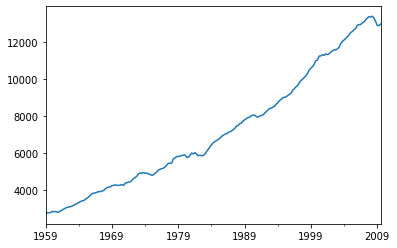

In [10]:
us_economy['realgdp'].plot()

In [11]:
# next we will try to separate the trend and cyclic component from realgdp #

In [12]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [13]:
gdp_cyclic, gdp_trend = hpfilter(us_economy['realgdp'],lamb=1600)

In [14]:
us_economy['gdp_cyclic'] =  gdp_cyclic
us_economy['gdp_trend'] =  gdp_trend

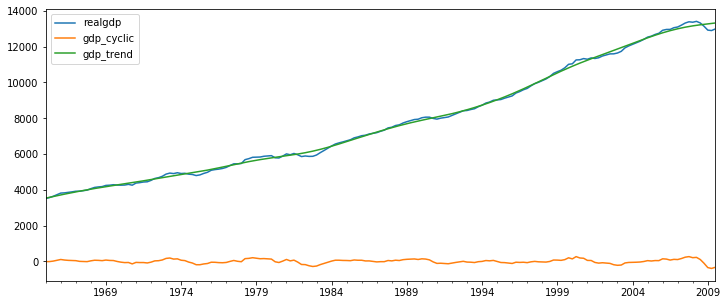

In [23]:
us_economy[['realgdp','gdp_cyclic','gdp_trend']].iloc[24:].plot()

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

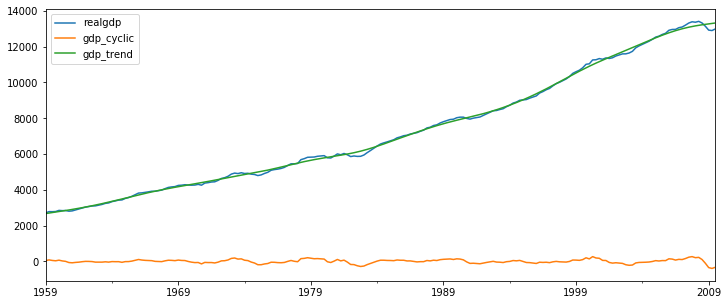

In [19]:
us_economy[['realgdp','gdp_cyclic','gdp_trend']].plot()

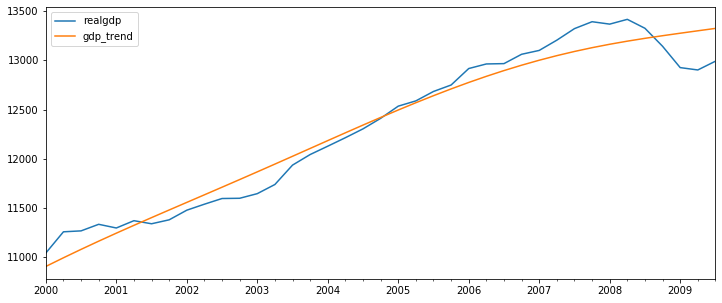

In [26]:
us_economy[['realgdp','gdp_trend']].loc['2000-03-31':].plot()

## ETS Decomposition

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore',message='')


In [5]:
# read the airline passenger data #
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [6]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [8]:
airline.index  # check if the index is a datetime index. if not use pd.to_datetime

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [9]:
#remove the na values
airline.dropna(inplace=True)

In [10]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

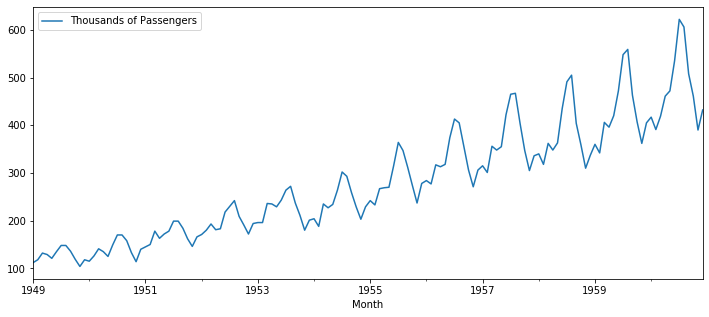

In [17]:
airline.plot();

- the trend seems to be increasing exponentially
- there is a seasonal component and also moments of spikes indicating the holiday season

Use the seasonal_decompose method of statsmodels library to decompose the trend and seasonality

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
decompose = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

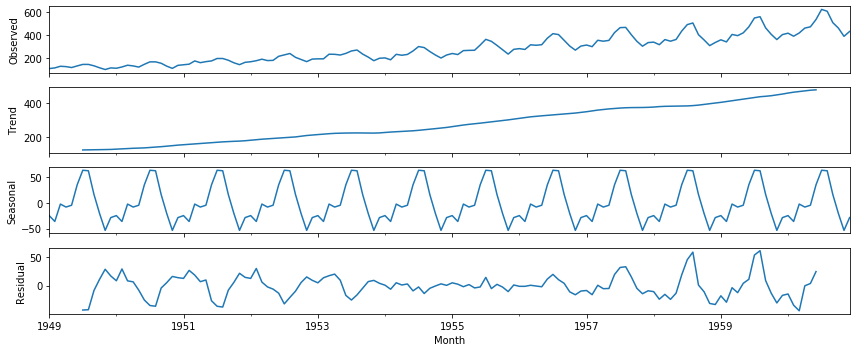

In [24]:
decompose.plot();

In [21]:
decompose = seasonal_decompose(airline['Thousands of Passengers'],model='additive')

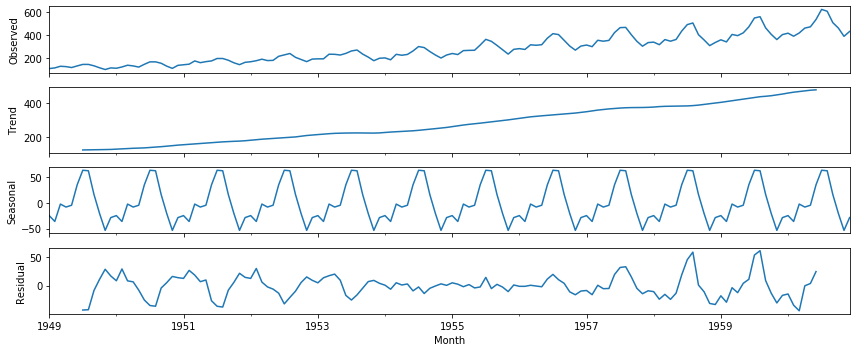

In [23]:
decompose.plot();

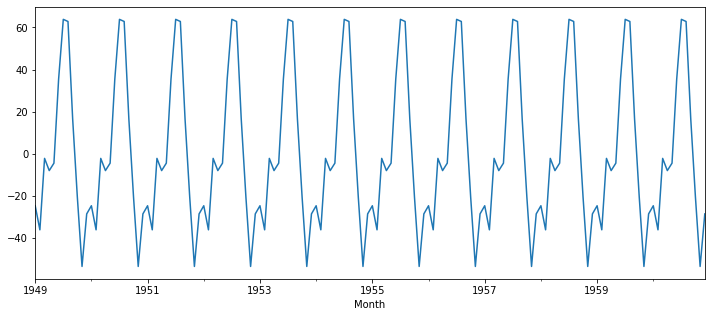

In [25]:
decompose.seasonal.plot()

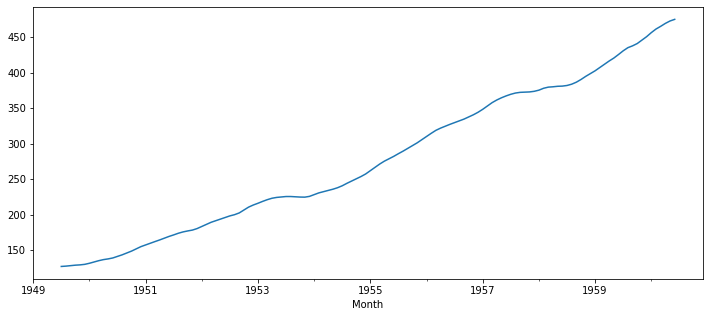

In [26]:
decompose.trend.plot()

## Simple Moving Average

In [27]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [30]:
airline.isna().sum()

Thousands of Passengers    0
dtype: int64

In [31]:
airline['SMA6'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [33]:
airline['SMA12'] = airline['Thousands of Passengers'].rolling(window=12).mean()

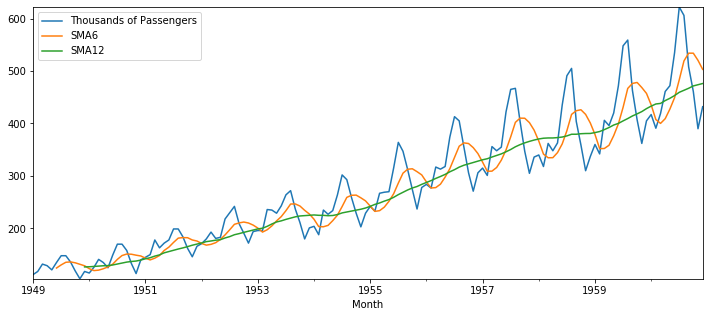

In [38]:
ax = airline.plot()
ax.autoscale(tight=True)


Disadvantages of SMA
- does not explain the trend or seasonality
- is susceptible to the extreme values in the history
- never matches with the valley or the peaks of the original data
- has a lag in the beginning equivalent to the window size

## Single Exponential Smoothing or EMWA 

In [41]:
airline['EMWA6'] = airline['Thousands of Passengers'].ewm(span=6,adjust=True).mean()

In [42]:
airline['EMWA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=True).mean()

In [43]:
airline.columns

Index(['Thousands of Passengers', 'SMA6', 'SMA12', 'EMWA6', 'EMWA12'], dtype='object')

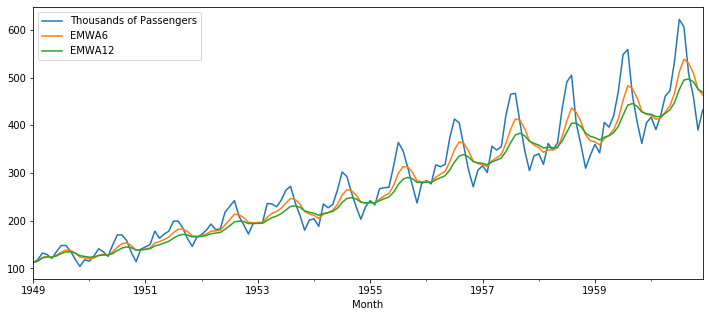

In [45]:
airline[['Thousands of Passengers','EMWA6', 'EMWA12']].plot()

In [46]:
# comparing the 12 month SMA to 12 month EWMA

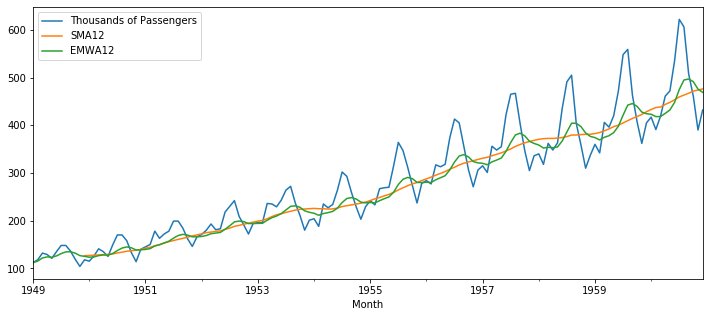

In [48]:
airline[['Thousands of Passengers','SMA12', 'EMWA12']].plot()

EWMA or single exponential smoothing is not able to explain the trend in the data
The smoothing factor only applies to the level. There is no smoothing factor to explain the trend and 
seasonality

## Double Exponential Smoothing or Holts Method

In [89]:
#standard imports and loading of the dataset 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12,5

import warnings
warnings.filterwarnings(action='ignore',message='')


In [90]:
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [91]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [92]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### Set a datetime frequency
- As the data is monthly and indicates the start of the month, use 'MS'

In [93]:
airline.index.freq = 'MS'

In [94]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [95]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

Simple Exponential Smoothing will give the same result as EWMA seen earlier

In [96]:
# define the span to calculate the alpha 
span = 12
alpha = 2/(span+1)  # this is as per the factor definition applied by Mr Holt in 1957

In [97]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [98]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [99]:
model = SimpleExpSmoothing(airline['Thousands of Passengers'])

In [100]:
fit = model.fit(smoothing_level=alpha,optimized = False)

In [101]:
fitted_values = fit.fittedvalues

In [102]:
airline['SES12'] = fitted_values.shift(-1)

In [103]:
airline

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861
...,...,...,...
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952


In [104]:
airline.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12'], dtype='object')

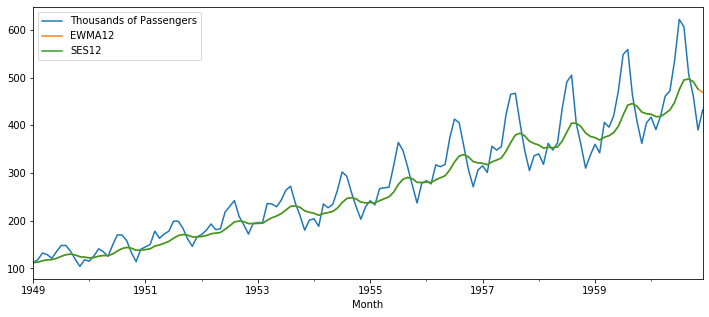

In [106]:
airline[['Thousands of Passengers', 'EWMA12', 'SES12']].plot()

EWMA and Single Exponential Smoothing are the same and hence we do not see any difference

In [107]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [116]:
# do all the steps in one line

airline['DES12add'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [117]:
airline

,Thousands of Passengers,EWMA12,SES12,DES12,DES12add
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336233,114.336233
1949-02-01,118,112.923077,112.923077,120.336233,120.336233
1949-03-01,132,115.857988,115.857988,134.336233,134.336233
1949-04-01,129,117.879836,117.879836,131.336233,131.336233
1949-05-01,121,118.359861,118.359861,123.336233,123.336233
...,...,...,...,...,...
1960-08-01,606,494.898619,494.898619,608.336233,608.336233
1960-09-01,508,496.914216,496.914216,510.336233,510.336233
1960-10-01,461,491.388952,491.388952,463.336233,463.336233


In [120]:
airline.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES12', 'DES12add'], dtype='object')

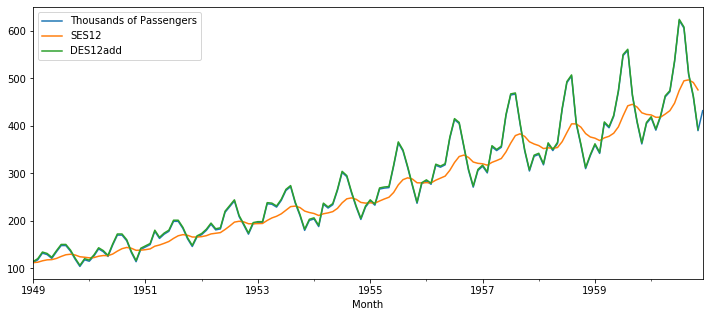

In [119]:
airline[['Thousands of Passengers','SES12', 'DES12add']].plot()

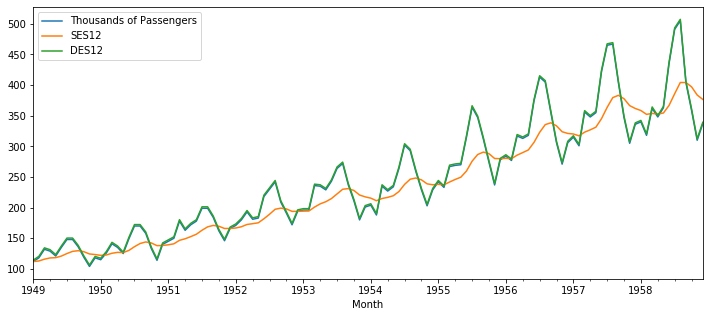

In [115]:
airline[['Thousands of Passengers','SES12', 'DES12']].iloc[:-24].plot()

In [128]:
#airline.drop('DES12',inplace=True,axis=1) # duplicate of DES12add

In [126]:
airline.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES12add'], dtype='object')

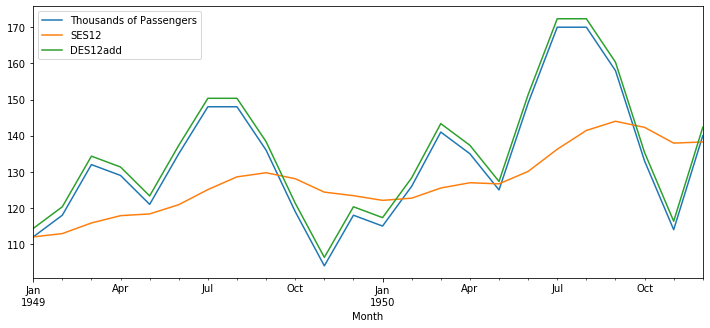

In [130]:
airline[['Thousands of Passengers', 'SES12', 'DES12add']].iloc[:24].plot()

Create another columns for double exponentil use the multiplicative trend

In [131]:
airline['DES12mul']=ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

In [132]:
airline

,Thousands of Passengers,EWMA12,SES12,DES12add,DES12mul
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336233,112.049247
1949-02-01,118,112.923077,112.923077,120.336233,118.051885
1949-03-01,132,115.857988,115.857988,134.336233,132.058041
1949-04-01,129,117.879836,117.879836,131.336233,129.056722
1949-05-01,121,118.359861,118.359861,123.336233,121.053204
...,...,...,...,...,...
1960-08-01,606,494.898619,494.898619,608.336233,606.266460
1960-09-01,508,496.914216,496.914216,510.336233,508.223369
1960-10-01,461,491.388952,491.388952,463.336233,461.202703


In [133]:
airline.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES12add', 'DES12mul'], dtype='object')

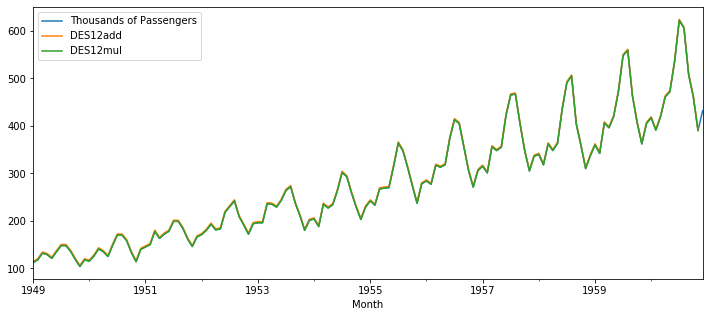

In [134]:
airline[['Thousands of Passengers','DES12add', 'DES12mul']].plot()

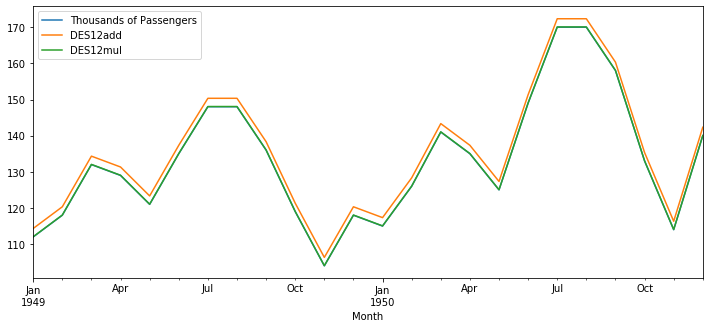

In [135]:
airline[['Thousands of Passengers','DES12add', 'DES12mul']].iloc[:24].plot()

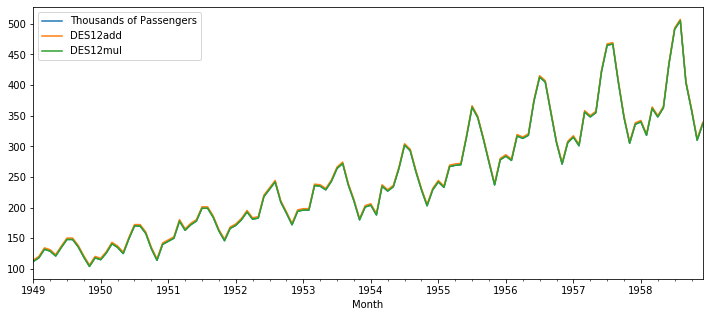

In [136]:
airline[['Thousands of Passengers','DES12add', 'DES12mul']].iloc[:-24].plot()

## Triple Exponential Smoothing or Holt Winters Method

In [143]:
airline['TESmul12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
airline.head()

,Thousands of Passengers,EWMA12,SES12,DES12add,DES12mul,TESmul12,TESadd12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.336233,112.049247,111.583236,113.081288
1949-02-01,118,112.923077,112.923077,120.336233,118.051885,118.839294,120.550747
1949-03-01,132,115.857988,115.857988,134.336233,132.058041,133.327416,135.527329
1949-04-01,129,117.879836,117.879836,131.336233,129.056722,127.915388,133.155064
1949-05-01,121,118.359861,118.359861,123.336233,121.053204,120.978320,125.656114


In [144]:
airline['TESadd12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline.head()

,Thousands of Passengers,EWMA12,SES12,DES12add,DES12mul,TESmul12,TESadd12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.336233,112.049247,111.583236,113.081288
1949-02-01,118,112.923077,112.923077,120.336233,118.051885,118.839294,120.550747
1949-03-01,132,115.857988,115.857988,134.336233,132.058041,133.327416,135.527329
1949-04-01,129,117.879836,117.879836,131.336233,129.056722,127.915388,133.155064
1949-05-01,121,118.359861,118.359861,123.336233,121.053204,120.978320,125.656114


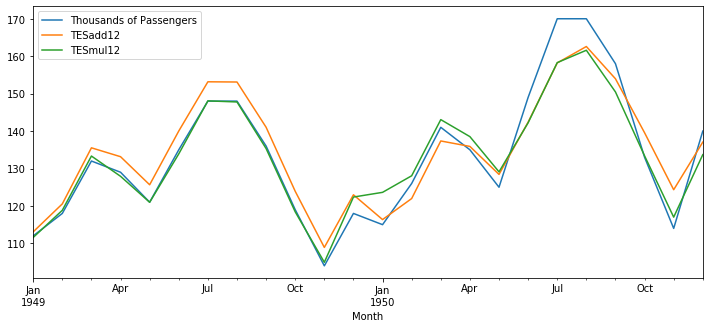

In [145]:
airline[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot();